# Probability Density Function (PDF)

A Probability Density Function (PDF) is a statistical concept used in probability theory and statistics to describe the likelihood of a continuous random variable falling within a particular range. It provides a way to model the distribution of a continuous random variable and is often associated with probability distributions such as the normal distribution.

## Key Points about PDFs:

1. **Continuous Random Variables:**
   - PDFs are primarily used for continuous random variables (as opposed to discrete random variables, which have Probability Mass Functions, or PMFs).

2. **Function Form:**
   - A PDF is a function that describes the relative likelihood of different outcomes for a continuous random variable.
   - The PDF for a normal distribution with mean \( \mu \) and standard deviation \( \sigma \) is given by:
     $ [ f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}} ] $

3. **Non-Negative Values:**
   - The values of the PDF are non-negative for all possible values of the random variable.
   - The integral (area under the curve) of the PDF over the entire range of possible values is equal to 1.

4. **Probability Interpretation:**
   - While the PDF itself does not give the probability of a specific outcome (as the probability at a single point is zero for a continuous variable), the probability of the variable falling within a specific interval is given by the integral of the PDF over that interval.

5. **Example:**
   - For example, in the case of a standard normal distribution, the PDF describes the shape of the bell curve and provides information about the likelihood of observing values within different ranges.

Mathematically, the probability that a continuous random variable $(X)$ falls within the interval $(a, b)$ is given by the integral of the PDF over that interval:

$ [ P(a \leq X \leq b) = \int_{a}^{b} f(x) \,dx ] $

The concept of PDF is fundamental in probability and statistics, and it plays a crucial role in understanding and modeling the behavior of continuous random variables.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

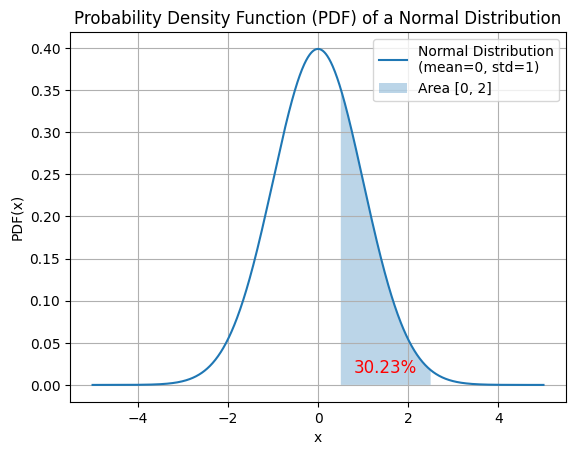

Percentage that X falls within [0, 2]: 30.23%


In [4]:
# Define parameters for the normal distribution
mu = 0    # mean
sigma = 1 # standard deviation

x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)

# Calculate the PDF using norm.pdf
pdf_values = norm.pdf(x, mu, sigma)

plt.plot(x, pdf_values, label=f'Normal Distribution\n(mean={mu}, std={sigma})')
plt.title('Probability Density Function (PDF) of a Normal Distribution')
plt.xlabel('x')
plt.ylabel('PDF(x)')

# Shade the area under the curve between 0 and 2
lower_bound = 0.5
upper_bound = 2.5
plt.fill_between(x, pdf_values, where=[(lower_bound <= xi <= upper_bound) for xi in x], alpha=0.3, label='Area [0, 2]')

# Calculate the percentage of getting a value between 0 and 2
percentage = (norm.cdf(upper_bound, mu, sigma) - norm.cdf(lower_bound, mu, sigma)) * 100

# Label the shaded area with the percentage
plt.text((lower_bound + upper_bound) / 2, 0.02, f'{percentage:.2f}%', ha='center', va='center', color='red', fontsize=12)

plt.legend()
plt.grid(True)
plt.show()

print(f'Percentage that X falls within [0, 2]: {percentage:.2f}%')


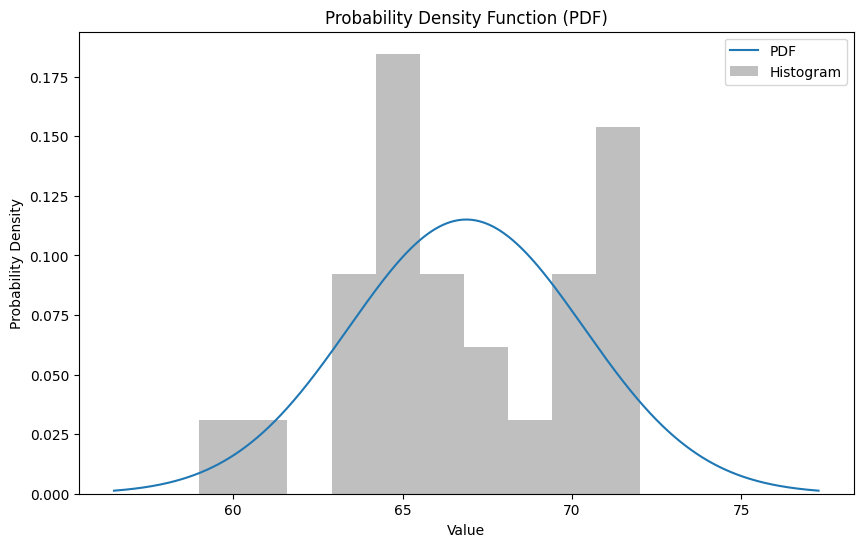

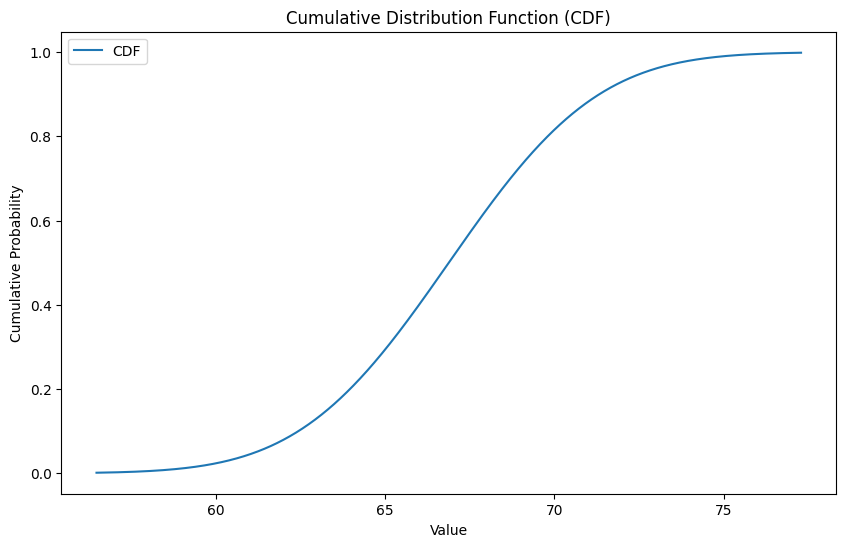

1.0


In [5]:
# Assume you have a real dataset (replace this with your actual data)

# real_dataset = np.random.randint(30, 75, 500)
real_dataset = np.array([68, 65, 69, 70, 70, 61, 59, 65, 64, 66, 72, 71, 68, 66, 64, 65, 65, 70, 71, 63, 72, 66, 65, 65, 72])

# Calculate mean and standard deviation from the real dataset
data_mean = np.mean(real_dataset)
data_std = np.std(real_dataset)

# Generate values for the PDF and CDF using the real dataset's mean and std
x = np.linspace(data_mean - 3 * data_std, data_mean + 3 * data_std, 1000)
pdf_values = stats.norm.pdf(x, data_mean, data_std)
cdf_values = stats.norm.cdf(x, data_mean, data_std)

# Plot the PDF
plt.figure(figsize=(10, 6))
plt.plot(x, pdf_values, label="PDF")
plt.hist(real_dataset, bins=10, density=True, alpha=0.5, color='gray', label="Histogram")
plt.title("Probability Density Function (PDF)")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(x, cdf_values, label="CDF")
plt.title("Cumulative Distribution Function (CDF)")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()


area, _ = quad(lambda x: norm.pdf(x, data_mean, data_std), -np.inf, np.inf)
print(area)  # This should be close to 1


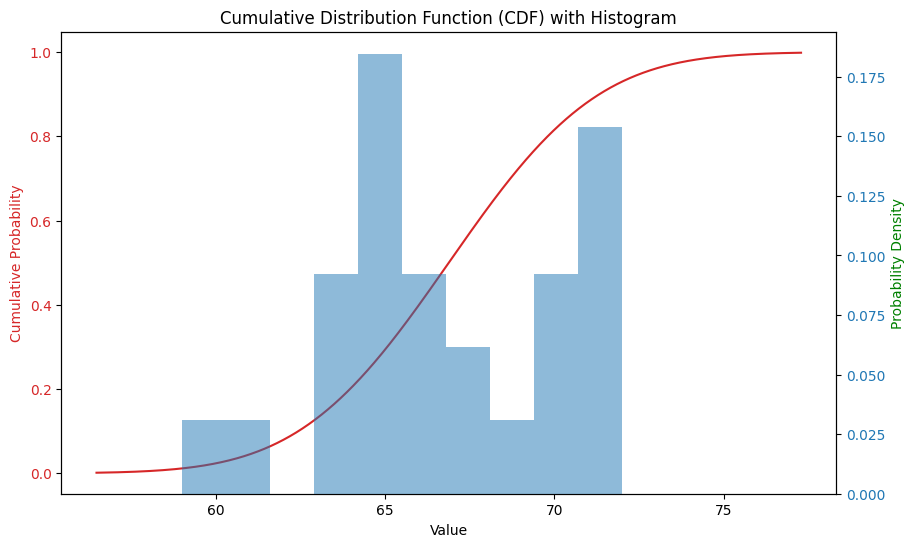

1.0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

# real_dataset = np.random.randint(30, 75, 500)
real_dataset = np.array([68, 65, 69, 70, 70, 61, 59, 65, 64, 66, 72, 71, 68, 66, 64, 65, 65, 70, 71, 63, 72, 66, 65, 65, 72])

# Calculate mean and standard deviation from the real dataset
data_mean = np.mean(real_dataset)
data_std = np.std(real_dataset)

# Generate values for the PDF and CDF using the real dataset's mean and std
x = np.linspace(data_mean - 3 * data_std, data_mean + 3 * data_std, 1000)
pdf_values = norm.pdf(x, data_mean, data_std)
cdf_values = norm.cdf(x, data_mean, data_std)

# Plot the CDF with a secondary y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Value')
ax1.set_ylabel('Cumulative Probability', color=color)
ax1.plot(x, cdf_values, label="CDF", color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a secondary y-axis for the histogram
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.hist(real_dataset, bins=10, density=True, alpha=0.5, color=color, label="Histogram")
ax2.set_ylabel('Probability Density', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("Cumulative Distribution Function (CDF) with Histogram")
plt.show()

# Print the total area under the PDF curve (should be close to 1)
area, _ = quad(lambda x: norm.pdf(x, data_mean, data_std), -np.inf, np.inf)
print(area)
